In [256]:
import numpy as np
import sys
import random
random.seed(9001)
eps = sys.float_info.epsilon

In [147]:
val = np.array([[4,0,1],[1,1,-1],[0,1,-1],[-2,-2,1]])

In [266]:
def VotedPerceptron(array, epoch=1):
    n = array.shape[1]
    w = np.zeros(n-1)
    b = 0
    c = 0
    ans = []
    for t in range(epoch):
        for x in array:
            y_pred = np.dot(x[:-1],w) + b
            if y_pred * x[-1] > 0:
                c = c + 1
            elif c != 0:
                ret = (np.copy(w), b, c)
                ans.append(ret)
                w += x[:-1] * x[-1]
                b += x[-1]
                c = 1
            else:
                c += 1
                w += x[:-1] * x[-1]
                b += x[-1]
        ans.append((np.copy(w),b,c))
    return ans
    
def sign(num):
    if num<=0:
        return -1
    else:
        return 1
    
def predictVoted(model, data):
    val = 0
    for m in model:
        val += m[2]*sign(np.dot(m[0],data)+m[1])
    return sign(val)

model = VotedPerceptron(val)
predictVoted(model, [1,2])

1

In [267]:
def VanillaPerceptron(array, epoch=1):
    n = array.shape[1]
    w = np.zeros(n-1)
    b = 0
    counter=0
    for t in range(epoch):
        for x in array:
            counter+=1
            y_pred = np.dot(x[:-1],w) + b
            if (y_pred * x[-1]) <= 0:
                w += x[:-1] * x[-1]
                b += x[-1]
            #print (counter, w, b)
    return (np.copy(w),b)
    
    
def predictVanilla(model, data):
    val = np.dot(model[0],data)+model[1]
    return sign(val)

model = VanillaPerceptron(val)
predictVanilla(model, [1,2])

-1

In [384]:
def get_rid_of_nulls(value):
    if value=='?':
        return n
    else:
        return value
import pandas as pd
breast_ds = pd.read_csv("breast-cancer-wisconsin.csv", sep=',', header=None)

In [385]:
col = breast_ds.columns
for i in col:
    breast_ds[i].replace('?', None, inplace=True)
breast_ds_pure = breast_ds.dropna(axis=1, how='any')
data = breast_ds_pure.iloc[:,1:]

In [386]:
breast_ds_pure

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [389]:
res = data.iloc[:,-1]
res = res - 3

In [390]:
data.iloc[:,-1] = res

In [391]:
breast_ds_arr = data.values.astype('int')

In [394]:
breast_ds_arr[24]

array([ 1,  1,  1,  1,  2,  1,  3,  1,  1, -1])

In [395]:
ion = pd.read_csv("ionosphere.csv", sep=',', header=None)
col = ion.columns
for i in col:
    ion[i].replace('?', None, inplace=True)
ion_ds_pure = ion.dropna(axis=0)
data = ion_ds_pure.iloc[:,1:]

In [396]:
data.iloc[:,-1] = data.iloc[:,-1].map({'b': -1, 'g': 1})

In [397]:
ion_arr = data.values.astype('float')

In [398]:
ion_arr

array([[  0.00000000e+00,   9.95390000e-01,  -5.88900000e-02, ...,
          1.86410000e-01,  -4.53000000e-01,   1.00000000e+00],
       [  0.00000000e+00,   1.00000000e+00,  -1.88290000e-01, ...,
         -1.37380000e-01,  -2.44700000e-02,  -1.00000000e+00],
       [  0.00000000e+00,   1.00000000e+00,  -3.36500000e-02, ...,
          5.60450000e-01,  -3.82380000e-01,   1.00000000e+00],
       ..., 
       [  0.00000000e+00,   9.47010000e-01,  -3.40000000e-04, ...,
          9.26970000e-01,  -5.77000000e-03,   1.00000000e+00],
       [  0.00000000e+00,   9.06080000e-01,  -1.65700000e-02, ...,
          8.74030000e-01,  -1.62430000e-01,   1.00000000e+00],
       [  0.00000000e+00,   8.47100000e-01,   1.35330000e-01, ...,
          8.57640000e-01,  -6.15100000e-02,   1.00000000e+00]])

In [212]:
#part 3

In [213]:
#Ionosphere Dataset

In [214]:
VotedPerceptron(ion_arr)

[(array([ 0.     ,  0.99539, -0.05889,  0.85243,  0.02306,  0.83398,
         -0.37708,  1.     ,  0.0376 ,  0.85243, -0.17755,  0.59755,
         -0.44945,  0.60536, -0.38223,  0.84356, -0.38542,  0.58212,
         -0.32192,  0.56971, -0.29674,  0.36946, -0.47357,  0.56811,
         -0.51171,  0.41078, -0.46168,  0.21266, -0.3409 ,  0.42267,
         -0.54487,  0.18641, -0.453  ]), 1.0, 1),
 (array([ 0.     , -0.00461,  0.1294 , -0.07792,  0.38462,  0.94266,
          0.55889,  0.     ,  0.08309,  0.34369,  0.49988,  0.25323,
          0.24762,  1.12221,  0.59292,  0.78857,  0.23695,  0.25103,
          0.67808,  0.70122,  0.15626,  0.55002, -0.11623,  0.77143,
         -0.24602,  0.61546, -0.27767,  0.40306, -0.22497,  0.58893,
         -0.48199,  0.32379, -0.42853]), 0.0, 6),
 (array([ 0.     , -0.00461,  0.1294 , -0.07792,  0.38462, -0.05734,
          1.55889,  0.     ,  0.08309,  1.34369,  1.49988,  0.25323,
          0.24762,  1.12221,  0.59292, -0.21143, -0.76305,  1.25103,
   

In [215]:
VanillaPerceptron(ion_arr)

(array([ 0.     ,  6.21147, -0.99725,  7.1674 ,  3.92617,  1.30611,
         2.4786 ,  0.98788,  3.49613, -1.46721, -2.57807, -2.21319,
         3.92031,  0.87412, -1.51396,  2.07902,  6.11757,  2.42863,
        -0.08722, -1.64445, -5.69072,  2.65991,  0.40273,  3.79799,
         4.02637, -2.04049, -0.10835, -0.78763,  0.94386,  3.9875 ,
        -2.97007, -0.78712, -4.49583]), -4.0)

In [216]:
#Breast Cancer Dataset

In [311]:
VotedPerceptron(breast_ds_arr)

[(array([-5., -1., -1., -1., -2., -1., -3., -1., -1.]), -1, 5),
 (array([ 3.,  9.,  9.,  7.,  5.,  9.,  6.,  6.,  0.]), 0, 1),
 (array([ 2.,  8.,  8.,  6.,  3., -1.,  3.,  5., -1.]), -1, 1),
 (array([ 0.,  7.,  6.,  5.,  1., -2.,  0.,  4., -2.]), -2, 1),
 (array([-2.,  6.,  5.,  4., -1., -3., -1.,  3., -7.]), -3, 12),
 (array([  5.,   9.,   7.,  14.,   4.,   7.,   4.,   7.,  -3.]), -2, 2),
 (array([  2.,   8.,   6.,  13.,   2.,   6.,   2.,   6.,  -4.]), -3, 2),
 (array([  1.,   7.,   5.,  12.,   0.,   5.,  -1.,   5.,  -5.]), -4, 2),
 (array([ -2.,   5.,   4.,  11.,  -1.,   4.,  -3.,   4.,  -6.]), -5, 2),
 (array([ -4.,   4.,   3.,  10.,  -3.,   3.,  -5.,   3.,  -7.]), -6, 1),
 (array([-5.,  3.,  0.,  9., -5.,  2., -6.,  2., -8.]), -7, 3),
 (array([  5.,  10.,   7.,  12.,   3.,   7.,   1.,   6.,  -5.]), -6, 1),
 (array([  3.,   9.,   6.,  10.,   1.,   6.,  -2.,   5.,  -6.]), -7, 1),
 (array([ 0.,  8.,  4.,  9., -1.,  5., -4.,  4., -7.]), -8, 1),
 (array([-2.,  7.,  3.,  8., -3.,  4., -6

In [312]:
VanillaPerceptron(breast_ds_arr)

(array([  1.62000000e+03,   1.50900000e+03,   1.50300000e+03,
          1.25700000e+03,   1.20100000e+03,  -2.33785590e+07,
          1.34900000e+03,   1.33700000e+03,   5.91000000e+02]), 216)

In [313]:
#Part 4

In [401]:
min_epoch = 5
diff_epoch = 5
max_epoch = 50

In [406]:
def merge_arrays(arr):
    out = np.array([])
    #print out.shape
    for r in arr:
        if r.shape[0]==0:
            pass
        elif out.shape[0]==0:
            out = r
        else:
            out = np.concatenate((out, r), axis=0)
    #print out.shape
    return out

def score(test_real, test_pred):
    total = float(len(test_real))
    same = 0.0
    for i in range(len(test_real)):
        if test_real[i]==test_pred[i]:
            same += 1.0
    return float(same/total)

def voted_perceptron_model(train, test, epoch=1):
    model = VotedPerceptron(train, epoch)
    test_in = np.delete(test, -1, axis=1)
    test_out = []
    for val in test_in:
        pred = predictVoted(model, val)
        test_out.append(pred)
    test_real = test[:,-1]
    return score(test_real, test_out)


def vanilla_perceptron_model(train, test, epoch=1):
    model = VanillaPerceptron(train, epoch)
    test_in = np.delete(test, -1, axis=1)
    test_out = []
    for val in test_in:
        pred = predictVanilla(model, val)
        test_out.append(pred)
    test_real = test[:,-1]
    return score(test_real, test_out)
    

def perceptron_cross_valid(arr, string):
    k = 10
    r = np.copy(arr)
    np.random.shuffle(r)
    split_arr = np.asarray(np.array_split(r, k))
    acc_mat = []
    for i in xrange(min_epoch, max_epoch+1, diff_epoch):
        ans_arr = []
        for j in range(k):
            test_arr = split_arr[j]
            train_arr = merge_arrays(split_arr[:j])
            t = merge_arrays(split_arr[j+1:])
            train_arr = merge_arrays([train_arr,t])
            if string=="voted":
                accuracy = voted_perceptron_model(train_arr, test_arr, i)
            elif string=="vanilla":
                accuracy = vanilla_perceptron_model(train_arr, test_arr, i)
            ans_arr.append(accuracy)
        larr = np.array(ans_arr)
        print ("Epoch {0} -> {1} +/- {2}").format(i, larr.mean(), 2*larr.std())
        acc_mat.append(larr.mean())
    return acc_mat
        


In [407]:
print "--Ionosphere Dataset--"
print "Accuracy of Voted Perceptron"
ion_acc_voted = perceptron_cross_valid(ion_arr, "voted")
print "Accuracy of Vanilla Perceptron"
ion_acc_vanilla = perceptron_cross_valid(ion_arr, "vanilla")

--Ionosphere Dataset--
Accuracy of Voted Perceptron
Epoch 5 -> 0.854841269841 +/- 0.0727200702474
Epoch 10 -> 0.863412698413 +/- 0.0645953741244
Epoch 15 -> 0.86626984127 +/- 0.0705421184555
Epoch 20 -> 0.860555555556 +/- 0.072545239619
Epoch 25 -> 0.854920634921 +/- 0.0801132984564
Epoch 30 -> 0.860476190476 +/- 0.0640365541867
Epoch 35 -> 0.851984126984 +/- 0.0786291274436
Epoch 40 -> 0.849206349206 +/- 0.0937986457314
Epoch 45 -> 0.846428571429 +/- 0.10326308782
Epoch 50 -> 0.849206349206 +/- 0.0937986457314
Accuracy of Vanilla Perceptron
Epoch 5 -> 0.823253968254 +/- 0.122492074805
Epoch 10 -> 0.823253968254 +/- 0.127712297133
Epoch 15 -> 0.828968253968 +/- 0.149333363703
Epoch 20 -> 0.823333333333 +/- 0.144212617033
Epoch 25 -> 0.820476190476 +/- 0.147052676942
Epoch 30 -> 0.812063492063 +/- 0.153140961846
Epoch 35 -> 0.811825396825 +/- 0.145531319926
Epoch 40 -> 0.820714285714 +/- 0.120957067776
Epoch 45 -> 0.826111111111 +/- 0.124176196959
Epoch 50 -> 0.846031746032 +/- 0.126132

In [409]:
print "--Breast Cancer Dataset--"
print "Accuracy of Voted Perceptron"
breast_acc_voted = perceptron_cross_valid(breast_ds_arr, "voted")
print "Accuracy of Vanilla Perceptron"
breast_acc_vanilla = perceptron_cross_valid(breast_ds_arr, "vanilla")

--Breast Cancer Dataset--
Accuracy of Voted Perceptron
Epoch 5 -> 0.957060041408 +/- 0.0405260980198
Epoch 10 -> 0.962774327122 +/- 0.0389299144358
Epoch 15 -> 0.967101449275 +/- 0.0314069598933
Epoch 20 -> 0.969958592133 +/- 0.0298225487108
Epoch 25 -> 0.971387163561 +/- 0.0285725087562
Epoch 30 -> 0.972836438923 +/- 0.029793989367
Epoch 35 -> 0.974265010352 +/- 0.0279606146178
Epoch 40 -> 0.974265010352 +/- 0.0279606146178
Epoch 45 -> 0.974265010352 +/- 0.0279606146178
Epoch 50 -> 0.972836438923 +/- 0.029793989367
Accuracy of Vanilla Perceptron
Epoch 5 -> 0.945672877847 +/- 0.0456216993819
Epoch 10 -> 0.961407867495 +/- 0.0313647581688
Epoch 15 -> 0.961407867495 +/- 0.0338675856995
Epoch 20 -> 0.958530020704 +/- 0.0392257539625
Epoch 25 -> 0.948530020704 +/- 0.0463421195295
Epoch 30 -> 0.96281573499 +/- 0.0227963003353
Epoch 35 -> 0.954285714286 +/- 0.0438922614164
Epoch 40 -> 0.96 +/- 0.0419912527334
Epoch 45 -> 0.958571428571 +/- 0.0392792202425
Epoch 50 -> 0.958571428571 +/- 0.046

In [412]:
import matplotlib.pyplot as plt

In [465]:
epochs = [i for i in xrange(min_epoch, max_epoch+1, diff_epoch)]
fig = plt.figure()
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs,breast_acc_voted , '.r-', label='Voted')
plt.plot(epochs,breast_acc_vanilla , '.b-', label='Vanilla')
plt.legend(loc='upper left')
plt.title('Perceptron of Breast Cancer Dataset')

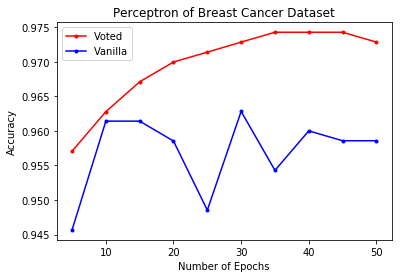

In [446]:
plt.show()

In [466]:
fig.savefig('q1_breast.png')

In [463]:
fig = plt.figure()
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs,ion_acc_voted , '.r-', label='Voted')
plt.plot(epochs,ion_acc_vanilla , '.b-', label='Vanilla')
plt.legend(loc='upper right')
plt.title('Perceptron of Ionosphere Dataset')

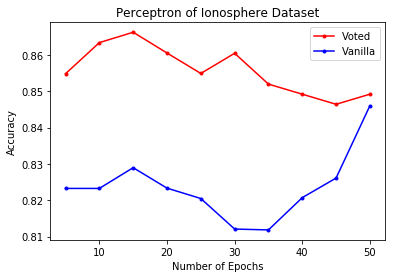

In [460]:
plt.show()


In [464]:
fig.savefig('q1_ion.png')